### Import Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
data_df = pd.read_csv('../datasets/yelp/yelp.csv')

In [3]:
data_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


### Explore data

In [4]:
data_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
data_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [7]:
data_df['text'][1]

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [8]:
data_df['length'] = data_df['text'].apply(len)

In [9]:
data_df['length'][1]

1345

In [10]:
data_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


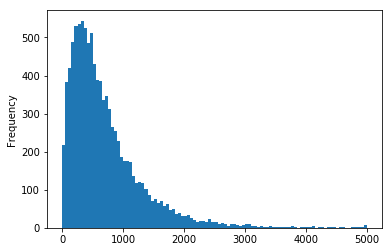

In [11]:
data_df['length'].plot(bins = 100, kind='hist')

In [12]:
data_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [13]:
data_df[data_df['length'] ==4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [14]:
data_df[data_df['length'] ==1]['text'].iloc[0]

'X'

In [15]:
data_df[data_df['length'] ==711]['text'].iloc[0]

'I\'m from Chicago so I\'m picky with my pizza--this place does it right (NY style)! I love the "hole in the wall" feel. Every customer that walked in was a regular which was a good sign. I ordered the Mozzarella sticks and a large Monster Pie (Sausage, pepperoni, bell peppers, onion and cheese). The mozzarella sticks took a little while to come out but they were cooked to perfection. They also threw in a few garlic knots which was awesome. The pizza was unbelievable--I think the crumbled sausage really did it! They have great deals like large pie & 20 wings for $20 which I definitely will be taking advantage of during football games on Sunday. Glad to have found a new place where I can also be a regular!'

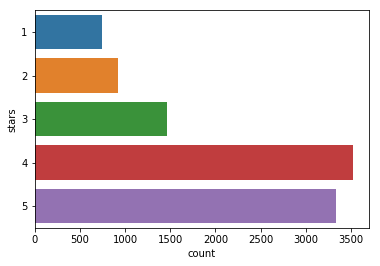

In [16]:
sns.countplot(y='stars', data=data_df)

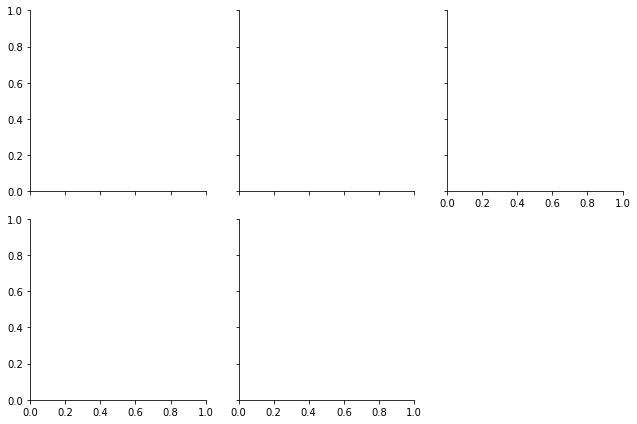

In [17]:
g = sns.FacetGrid(data = data_df, col = 'stars', col_wrap=3)

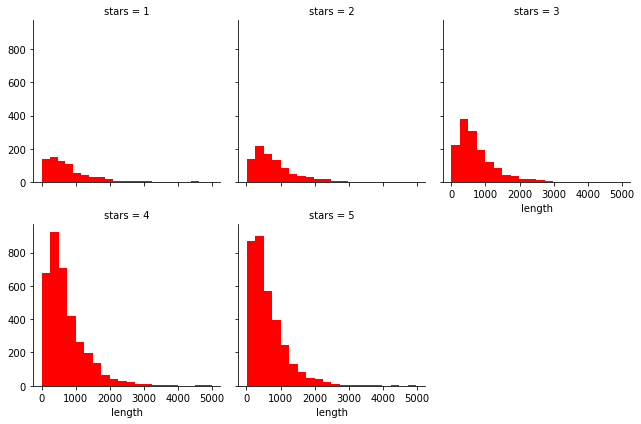

In [18]:
g = sns.FacetGrid(data = data_df, col = 'stars', col_wrap=3)
g.map(plt.hist, 'length', bins = 20, color = 'r')

In [19]:
data_df_onestar = data_df[data_df['stars']==1]

In [20]:
data_df_onestar.shape

(749, 11)

In [21]:
data_df_fivestar = data_df[data_df['stars']==5]

In [22]:
data_df_fivestar.shape

(3337, 11)

In [23]:
data_df_one_five_stars= pd.concat([data_df_onestar,data_df_fivestar])

In [24]:
data_df_one_five_stars.shape

(4086, 11)

In [25]:
data_df_one_five_stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
length         4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


### Data Cleaning

#### removing Punctionation

In [73]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
test_string = 'hello. I have  isnt tstuff you other is I can get rid of in here! and. for ? stop word + '

In [75]:
test_remove_punc = [char for char in test_string if char not in string.punctuation ]

In [76]:
test_remove_pun

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'I',
 ' ',
 'h',
 'a',
 'v',
 'e',
 ' ',
 's',
 't',
 'u',
 'f',
 'f',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'c',
 'a',
 'n',
 ' ',
 'g',
 'e',
 't',
 ' ',
 'r',
 'i',
 'd',
 ' ',
 'o',
 'f',
 ' ',
 'i',
 'n',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 ' ',
 ' ',
 ' ']

In [77]:
test_remove_pun_string = ''.join(test_remove_punc)

In [78]:
test_remove_pun_string

'hello I have  isnt tstuff you other is I can get rid of in here and for  stop word  '

#### Removing Stop words

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sage\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [83]:
test_remove_punc_remove_stop = [word for word in test_remove_pun_string.split() if word.lower() not in stopwords.words('english') ]

In [84]:
test_remove_punc_remove_stop

['hello', 'isnt', 'tstuff', 'get', 'rid', 'stop', 'word']

#### Count Vectorizing 

In [96]:
test_data = ['testing data data to test on', 'more words to do a test test test one', 'a few more test words']

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
test_data_vec = vectorizer.fit_transform(test_data)


In [98]:
print(vectorizer.get_feature_names())

['data', 'do', 'few', 'more', 'on', 'one', 'test', 'testing', 'to', 'words']


In [99]:
print(test_data_vec.toarray())

[[2 0 0 0 1 0 1 1 1 0]
 [0 1 0 1 0 1 3 0 1 1]
 [0 0 1 1 0 0 1 0 0 1]]


### Clean Data for Model

In [115]:
def text_clean(message):
    remove_punc = [char for char in message if char not in string.punctuation ]
    remove_punc_string = ''.join(remove_punc)
    remove_punc_remove_stop = [word for word in remove_punc_string.split() if word.lower() not in stopwords.words('english') ]
    return remove_punc_remove_stop

In [116]:
data_df_cleaned = data_df['text'].apply(text_clean)

In [117]:
data_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [118]:
data_df_cleaned

0       [wife, took, birthday, breakfast, excellent, w...
1       [idea, people, give, bad, reviews, place, goes...
2       [love, gyro, plate, Rice, good, also, dig, can...
3       [Rosie, Dakota, LOVE, Chaparral, Dog, Park, co...
4       [General, Manager, Scott, Petello, good, egg, ...
5       [Quiessence, simply, put, beautiful, Full, win...
6       [Drop, youre, drive, ate, go, back, next, day,...
7       [Luckily, didnt, travel, far, make, connecting...
8       [Definitely, come, Happy, hour, Prices, amazin...
9       [Nobuo, shows, unique, talents, everything, me...
10      [oldish, man, owns, store, sweet, Perhaps, swe...
11      [Wonderful, Vietnamese, sandwich, shoppe, bagu...
12      [limited, time, thing, going, right, BBQ, chic...
13      [Good, tattoo, shop, Clean, space, multiple, a...
14      [Im, 2, weeks, new, Phoenix, looked, Irish, ba...
15      [worth, 21, salad, small, pizza, Absolutely, B...
16      [went, Saturday, afternoon, place, incredibly,...
17      [okay,

In [119]:
print(data_df_cleaned[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [120]:
print(data_df['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [ ]:
### Count vectorizert

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=text_clean)

yelp_vectorizer = vectorizer.fit_transform(data_df['text'])


In [122]:
print(vectorizer.get_feature_names())

['0', '00', '007', '00s', '01', '01042012', '010712', '02', '020', '022010', '03342', '039', '039oz', '04052012', '05', '050', '06', '07', '07092008', '072511', '075', '08', '09', '090', '095', '099', '1', '10', '100', '1000', '10000', '100000', '1000am', '1000pm', '1000s', '1000x', '1001', '100150', '1002', '1007', '100am', '100night', '100pm', '100s', '100th', '100yearold', '101', '1010', '10102010Great', '1011', '101112', '1012', '1012glass', '1012pm', '101412', '1015', '1015ft', '101if', '102', '1024', '1025', '102729', '1030', '103011', '1030330', '1030AM', '1030am', '1030pm', '10312012', '1033', '104', '105', '1050', '1058', '1059', '105°', '1070', '1075', '107F', '108', '109', '1095', '1097', '1099', '10K', '10Shrimp', '10X', '10am', '10am4pm', '10bowl', '10close', '10cocktail', '10each', '10for', '10gallon', '10ish', '10k', '10mile', '10min', '10mins', '10minutes', '10month', '10night', '10oz', '10p', '10person', '10pm', '10pm12am', '10pm2am', '10pp', '10th', '10thand', '10top'

In [124]:
print(yelp_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [125]:
yelp_vectorizer.shape

(10000, 44012)

### Model 

In [126]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
label = data_df['stars'].values

In [127]:
label

array([5, 5, 4, ..., 4, 2, 5], dtype=int64)

In [128]:
nb_classifier.fit(yelp_vectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [150]:
# test_sample = ['Amazing food! It was great!']
# test_sample = ["it was ok. Maybe I'd come back"]
test_sample = ['It was bad. Made me very sick']


test_sample_vec = vectorizer.transform(test_sample)
test_pred = nb_classifier.predict(test_sample_vec)

In [151]:
test_pred

array([1], dtype=int64)

In [152]:
### Train test split

In [153]:
X = yelp_vectorizer

In [154]:
y = label

In [155]:
print(X.shape)
print(y.shape)

(10000, 44012)
(10000,)


In [158]:

# Create train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 5)

In [159]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)